In [50]:
import pandas as pd
titanic_df=pd.read_csv(r'.\train.csv')

In [6]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 개수',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [8]:
print('Sex 값 분포:\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [9]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [23]:
titanic_pcalss=titanic_df['Pclass']
type(titanic_pcalss)

pandas.core.series.Series

In [24]:
titanic_pcalss

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [25]:
value_counts=titanic_df['Pclass'].value_counts()
value_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
titanic_df=pd.read_csv(r'./train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
titanic_df.groupby(['Sex'])['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

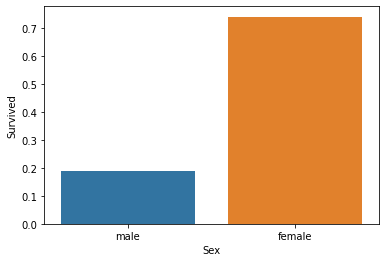

In [33]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()
sns.barplot(x='Sex',y='Survived',data=titanic_df,ci=None)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

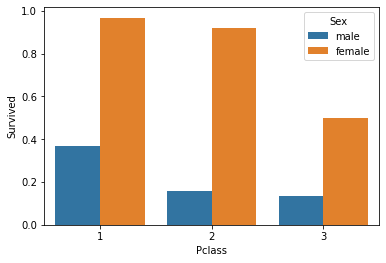

In [42]:
titanic_df.groupby(['Pclass','Survived'])['Survived'].count()
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df,ci=None)

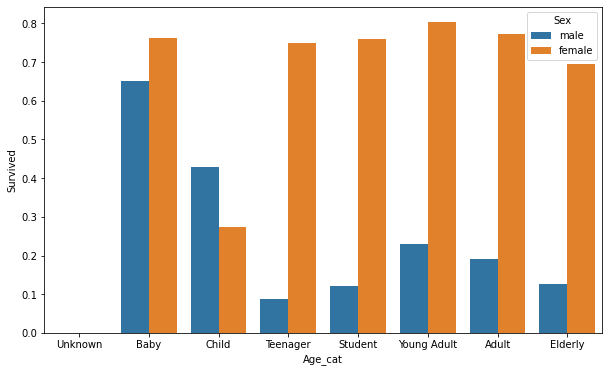

In [48]:
def get_category(age) :
    cat=''
    if age<=-1: cat='Unknown'
    elif age<=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else : cat='Elderly'
    return cat
plt.figure(figsize=(10,6))
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names,ci=None)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [51]:
from sklearn import preprocessing
def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features :
        le=preprocessing.LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
    return dataDF
titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


In [63]:
from sklearn.preprocessing import LabelEncoder


def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df
def format_feature(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df
def transform_feature(df):
    df=fillna(df)
    df=Drop_features(df)
    df=format_feature(df)
    return df


In [64]:
from sklearn.preprocessing import LabelEncoder
titanic_df=pd.read_csv(r'./train.csv')
y_titanic_df=titanic_df['Survived']
x_titanic_df=titanic_df.drop('Survived',axis=1)
x_titanic_df=transform_feature(x_titanic_df)

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()
dt_clf.fit(x_train,y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도 :{0:4f}'.format(accuracy_score(y_test,dt_pred)))
rf_clf.fit(x_train,y_train)
rf_pred=rf_clf.predict(x_test)
print('RandomForestClassifier 정확도 :{0:4f}'.format(accuracy_score(y_test,rf_pred)))
lr_clf.fit(x_train,y_train)
lr_pred=lr_clf.predict(x_test)
print('LogisticRegression 정확도 :{0:4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도 :0.787709
RandomForestClassifier 정확도 :0.854749
LogisticRegression 정확도 :0.849162


c:\Users\rlawp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [73]:
from sklearn.model_selection import KFold
def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores=[]
    for iter_count, (train_index,test_index) in enumerate(kfold.split(x_titanic_df)):
        x_train,x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train,y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        clf.fit(x_train,y_train)
        predictions=clf.predict(x_test)
        accuracy=accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print('교차 검증{0} 정확도 {1:.4f}'.format(iter_count,accuracy))
    mean_score=np.mean(scores)
    print('평균 정확도 : {0:.4f}'.format(mean_score))
exec_kfold(dt_clf, folds=5)


교차 검증0 정확도 0.7542
교차 검증1 정확도 0.7809
교차 검증2 정확도 0.7865
교차 검증3 정확도 0.7697
교차 검증4 정확도 0.8202
평균 정확도 : 0.7823


array([0.74301676, 0.7752809 , 0.79213483, 0.78651685, 0.84269663])

In [72]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_clf, x_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증{0} 정확도 : {1:.4f}'.format(iter_count,accuracy))
print('평균 정확도 :{0:.4f}'.format(np.mean(scores)))

교차 검증0 정확도 : 0.7430
교차 검증1 정확도 : 0.7753
교차 검증2 정확도 : 0.7921
교차 검증3 정확도 : 0.7865
교차 검증4 정확도 : 0.8427
평균 정확도 :0.7879


In [74]:
from sklearn.model_selection import GridSearchCV
parameters={'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}
grid_dclf=GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(x_train,y_train)
print('GridSearchCV 최적 하이퍼 파라미터',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_
dpredictions=best_dclf.predict(x_test)
accuracy=accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 :{0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 :0.8715


In [75]:
from sklearn.model_selection import GridSearchCV
parameters={'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}
grid_dclf=GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(x_train,y_train)
print('GridSearchCV 최적 하이퍼 파라미터',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_
dpredictions=best_dclf.predict(x_test)
accuracy=accuracy_score(y_test,dpredictions)
precision=precision_score(y_test,dpredictions)
recall=recall_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 :{0:.4f}'.format(accuracy))
print('테스트 세트에서의 DecisionTreeClassifier 정밀도 :{0:.4f}'.format(precision))
print('테스트 세트에서의 DecisionTreeClassifier 재현율 {0:.4f}'.format(recall))


GridSearchCV 최적 하이퍼 파라미터 {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 :0.8715
테스트 세트에서의 DecisionTreeClassifier 정밀도 :0.8393
테스트 세트에서의 DecisionTreeClassifier 재현율 0.7705


In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()
# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data
# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)
# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)
X_train, X_test, y_train, y_test =  train_test_split(iris_data, iris_label,test_size=0.2, random_state=11)
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
# 학습 수행
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


In [8]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris.target_names,feature_names=iris.feature_names,impurity=True,filled=True)

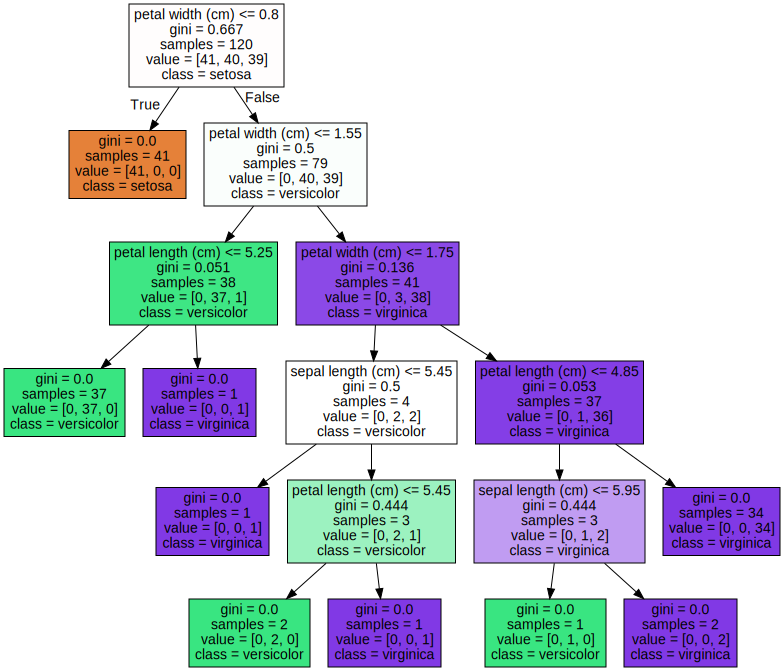

In [9]:
import graphviz
with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)


iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


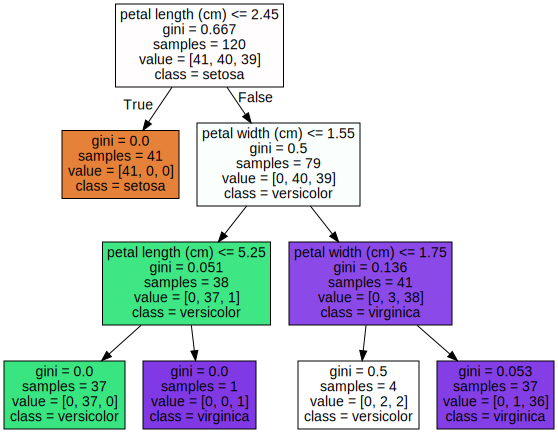

In [40]:
iris = load_iris()
# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data
# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)
# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)
X_train, X_test, y_train, y_test =  train_test_split(iris_data, iris_label,test_size=0.2, random_state=11)
# DecisionTreeClassifier 객체 생성
dt_clf=DecisionTreeClassifier(max_depth=3,random_state=156)
# 학습 수행
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
from sklearn.tree import export_graphviz
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris.target_names,feature_names=iris.feature_names,impurity=True,filled=True)
with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)


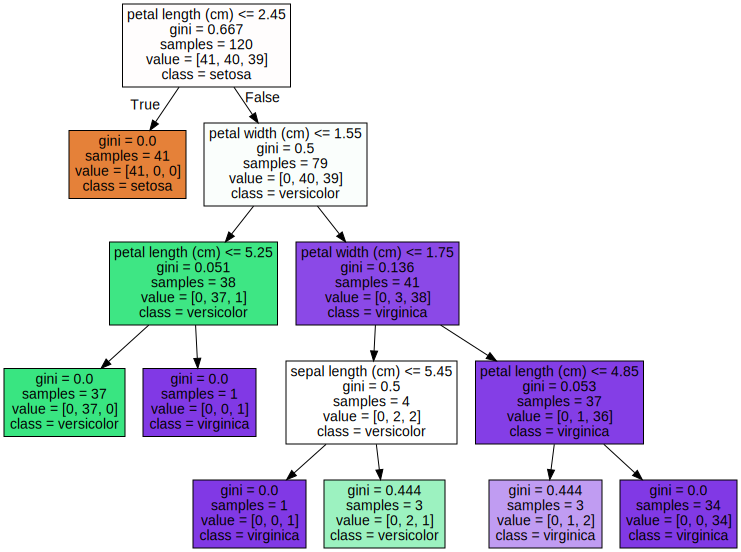

In [43]:
dt_clf=DecisionTreeClassifier(min_samples_split=4,random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
from sklearn.tree import export_graphviz
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris.target_names,feature_names=iris.feature_names,impurity=True,filled=True)
with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)


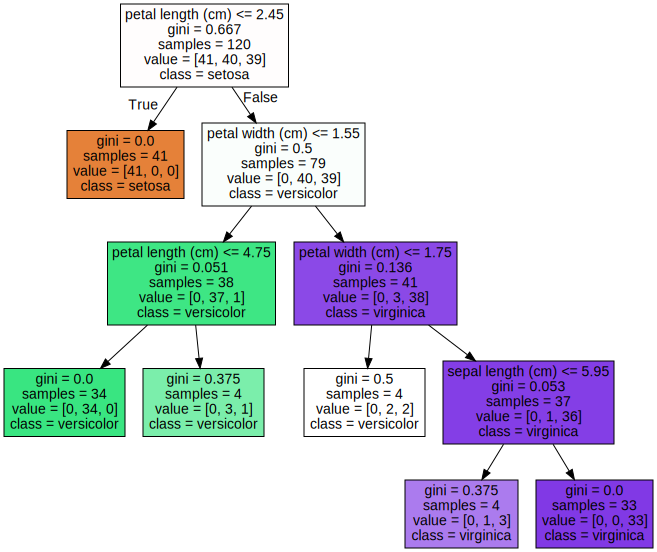

In [37]:
dt_clf=DecisionTreeClassifier(min_samples_leaf=4,random_state=156)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
from sklearn.tree import export_graphviz
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris.target_names,feature_names=iris.feature_names,impurity=True,filled=True)
with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)


feature importances:
[0.009 0.    0.557 0.435]
sepal length (cm):0.009
sepal width (cm):0.000
petal length (cm):0.557
petal width (cm):0.435


<AxesSubplot:>

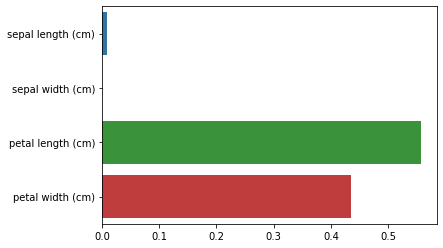

In [44]:
import seaborn as sns
import numpy as np
%matplotlib inline
print("feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))
for name,value in zip(iris.feature_names,dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))
sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)

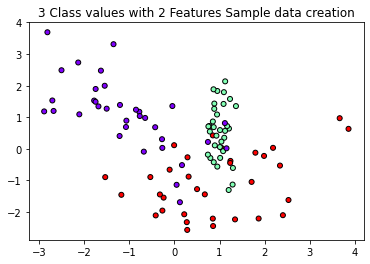

In [47]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt 
%matplotlib inline
plt.title('3 Class values with 2 Features Sample data creation')
X_features,y_labels=make_classification(n_features=2,n_redundant=0,n_informative=2, n_classes=3,n_clusters_per_class=1,random_state=0)
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,cmap='rainbow',edgecolor='k')
